<a href="https://colab.research.google.com/github/jhguay/base_ouverte/blob/main/VoteDemocrate2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exemple simplifié de l'usage du machine learning à partir de données statistiques: élections présidentielles américaines 2020 avec trois variables prédictives et une variable cible**



**Première** étape: les éléments préparatoires

**Deuxième** étape: la sélection et la transformation des données pour l'utilisation des algorithmes

**Troisième** étape: l'application de l'algorithme choisi et la visualisation des résultats

# **Première étape: les éléments préparatoires**


In [1]:
#Importation des prémières bibliothèques utilisées
import scipy # bibliothèque de calcul scientifique 
import matplotlib # bibliothèque d'affichage graphique
import sklearn # bibliothèque d'algorithmes "classiques" d'apprentissage automatique 
from numpy import * # bibliothèque de calcul matriciel
from pandas import * # bibliothèque de manipulation de tableaux de données
from sklearn import * # bibliothèque d'algorithmes "classiques" d'apprentissage automatique
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from pandas import DataFrame, read_csv
%matplotlib inline
import IPython
import sys 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Inspiration: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/


In [2]:
#Création d'une méthode utiltérieurement utilisées pour l'affichage des données
def afficher_matrice_confusion(cm, noms_etiquettes = [u'classe - 0', u'classe - 1', u'classe - 3'],
                   titre=u'Matrice de confusion'):

    print("\n",cm,"\n")
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title(titre)
    plt.colorbar()
    tick_marks = np.arange(len(noms_etiquettes))
    plt.xticks(tick_marks, noms_etiquettes, rotation=60)
    plt.yticks(tick_marks, noms_etiquettes)
    plt.ylabel(u'Vraie étiquette')
    plt.xlabel(u'Étiquette prédite')
    # Fonction d'ajustement
    plt.tight_layout()
    plt.show()

In [ ]:
'''
import os
GERME_ALEATOIRE = 21
os.environ['PYTHONHASHSEED'] = str(GERME_ALEATOIRE)
import random
random.seed(GERME_ALEATOIRE)
import numpy as np
np.random.seed(GERME_ALEATOIRE)
'''

"\nimport os\nGERME_ALEATOIRE = 21\nos.environ['PYTHONHASHSEED'] = str(GERME_ALEATOIRE)\nimport random\nrandom.seed(GERME_ALEATOIRE)\nimport numpy as np\nnp.random.seed(GERME_ALEATOIRE)\n"

In [7]:
# Lecture des données
# Création d'une liste de noms d'attributs en français
donnees_initiales_df = pd.read_csv("anes_timeseries_cdf_csv_20220916.csv")






/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,5,6,7,8,9,13,14,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,38,39,40,41,42,43,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,233,254,275,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,361,38

In [ ]:
#Visualisation des données
donnees_initiales_df.head()

In [ ]:
# Vérification des formats
donnees_initiales_df.shape

In [ ]:
donnees_initiales_df.columns

In [57]:
table=donnees_initiales_df['VCF0004'].value_counts()
b2020 = donnees_initiales_df[donnees_initiales_df['VCF0004'] == 2020]
b2020.shape
b2020=b2020.get(['VCF0104','VCF0114','VCF0106','VCF0101','VCF0713'])
b2020=b2020[b2020['VCF0104']>0]
b2020=b2020[b2020['VCF0114']>0]
b2020=b2020[b2020['VCF0106']>0]
b2020=b2020[b2020['VCF0101']>0]
b2020=b2020[b2020['VCF0713']>0]
b2020.shape

(7159, 5)

In [58]:
b2020.to_csv("b2020CinqVariables.csv")

In [ ]:
#Genre du répondant=VCF0104
#1. Male
#2. Female
#3. Other (2016)

#Revenu en Percentile=VCF0114
#1. 0 to 16 percentile
#2. 17 to 33 percentile
#3. 34 to 67 percentile
#4. 68 to 95 percentile
#5. 96 to 100 percentile

#Race en trois categories=VCF0106
#1. White non-Hispanic
#2. Black non-Hispanic
#3. Other

#Age du répondant=VCF0101

#Vote pour la président=VCF0713
#1. Democratic candidate (with or without qualifications, 1952-1976)
#2. Republican candidate (with or without qualifications, 1952-1976)
#3. Undecided; DK (except 1964)
#4. R does not intend to vote (incl. ‘no, qualified’ if will vote, 1952-1976) or does not intend to vote for President
#9. Other candidate


In [61]:
b2020.head()
b2020['VCF0104'].value_counts()
b2020['VCF0114'].value_counts()
b2020['VCF0106'].value_counts()
b2020['VCF0101'].value_counts()
b2020['VCF0713'].value_counts()

1    3580
2    2806
4     524
9     249
Name: VCF0713, dtype: int64

# **Deuxième étape: la sélection et la transformation des données pour l'utilisation des algorithmes**

In [62]:
cibles_df = b2020['VCF0713']

In [63]:
cibles_df.shape

(7159,)

In [64]:
predicteurs_df = b2020.drop(['VCF0713'],axis='columns')

In [65]:
predicteurs_df.shape

(7159, 4)

In [66]:
cibles_df

59944    2
59945    9
59946    1
59947    1
59948    2
        ..
68217    2
68219    2
68220    2
68221    1
68223    1
Name: VCF0713, Length: 7159, dtype: object

In [67]:
#Transformation des données de la cible en données numériques
encodeur = LabelEncoder()
encodeur.fit(cibles_df.values)
cibles = encodeur.transform(cibles_df)
# Afficher les dix premières cibles
cibles [:10]

array([1, 3, 0, 0, 1, 0, 1, 1, 0, 0])

In [68]:
#conversion des données en nombre décimales
predicteurs = predicteurs_df.values
print(predicteurs)

[[1 4 3 46]
 [2 3 3 37]
 [2 4 1 40]
 ...
 [2 4 1 52]
 [1 3 3 45]
 [2 3 3 38]]


In [69]:
#Division des données pour l'entraintement et le test
test_ratio = 0.20
predicteurs_ent, predicteurs_test, cibles_ent, cibles_test = train_test_split(predicteurs,
                                                                              cibles,
                                                                              test_size=test_ratio,
                                                                              stratify=cibles_df,
                                                                              random_state=42)

In [70]:
print("Dimensions de predicteurs entrainement:",predicteurs_ent.shape)
print("Dimensions de predicteurs test:",predicteurs_test.shape)
print("Dimensions de cibles entrainement:",cibles_ent.shape)
print("Dimensions de cibles test:",cibles_test.shape)

Dimensions de predicteurs entrainement: (5727, 4)
Dimensions de predicteurs test: (1432, 4)
Dimensions de cibles entrainement: (5727,)
Dimensions de cibles test: (1432,)


#**Troisième étape: l'application de l'algorithme choisi et la visualisation des résultats**


In [73]:
#Trois modèles de classification. Il faut en choisir un à la fois
classification_logistique = LogisticRegression(solver='liblinear', multi_class='ovr')
foret_aleatoire = RandomForestClassifier()
arbres_dopage_gradient = xgb.XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')

#ici on choisit le modèle et on indique son nom
modele=arbres_dopage_gradient
nom_modele="arbres_dopage_gradient"


>  arbres_dopage_gradient: 0.538325 (0.011625)
>  arbres_dopage_gradient: - Erreur de classification sur les données test: 678
>  arbres_dopage_gradient- Exactitude: 0.53
Matrice de confusion:


 [[454 262   0   0]
 [261 300   0   0]
 [ 59  46   0   0]
 [ 31  19   0   0]] 



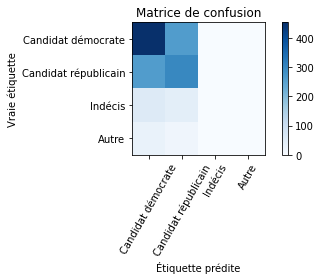


Rapport de classification:
               precision    recall  f1-score   support

           0       0.56      0.63      0.60       716
           1       0.48      0.53      0.51       561
           2       0.00      0.00      0.00       105
           3       0.00      0.00      0.00        50

    accuracy                           0.53      1432
   macro avg       0.26      0.29      0.28      1432
weighted avg       0.47      0.53      0.50      1432

------------------------------------------------------------------------------------------ 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
validation_croisee = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
resultat_vc = cross_val_score(modele,predicteurs_ent,cibles_ent,cv=validation_croisee,scoring='accuracy')
print('>  %s: %f (%f)' % (nom_modele, resultat_vc.mean(), resultat_vc.std()))
modele.fit(predicteurs_ent, cibles_ent)
test_predictions = modele.predict(predicteurs_test)
print('>  %s: - Erreur de classification sur les données test: %d' % 
(nom_modele, (cibles_test != test_predictions).sum()))
print('>  %s- Exactitude: %.2f' % 
(nom_modele, accuracy_score(cibles_test, test_predictions)))
# Affichage d'une matrice de confusion et d'un rapport de classification
print("Matrice de confusion:\n")
afficher_matrice_confusion(confusion_matrix(cibles_test, test_predictions),['Candidat démocrate','Candidat républicain', 'Indécis','Autre'])
print("\nRapport de classification:\n",classification_report(cibles_test, test_predictions))
print("-"*90,"\n")
